In [0]:
import numpy as np
import math
import random
import scipy
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

a) Wygeneruj 10 000 liczb z rozkładu jednostajnego na odcinku [-1, 1]. Sporządź ich histogram z
100 przedziałami. Porównaj histogram z wykresem funkcji gęstości. Powtórz obliczenia dla
100 000 liczb.

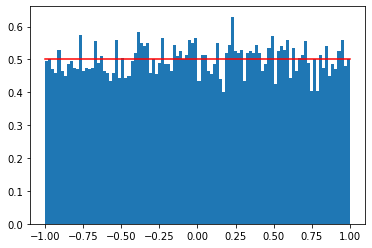

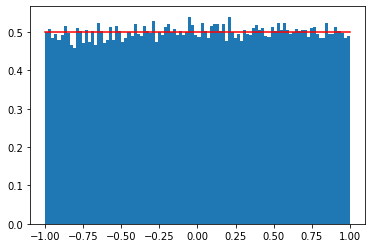

In [8]:
def jednostajny(n):
  sample = np.random.uniform(-1, 1, n)
  a, x, b = plt.hist(sample, 100, density=True)
  y = np.ones_like(x) / 2
  plt.plot(x, y, color = 'r')
  plt.show()

jednostajny(10000)
jednostajny(100000)




b) Rozkład normalny, średnia 5 odchylenie 3

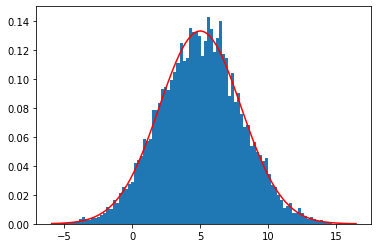

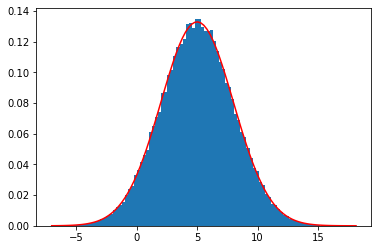

In [9]:
def density(x, mean, dev):
  a = 1/(dev* math.sqrt(2*np.pi))
  b = -1*(((x-mean)**2)/(2*(dev**2)))
  return a * math.exp(b)


def normalny(n, mean, dev):
  def thisdensity(x):
    return density(x, mean, dev)
  sample = np.random.normal(mean, dev, n)
  a, x, b = plt.hist(sample, 100, density=True)
  y = list(map(thisdensity, x))
  plt.plot(x, y, color = 'r')
  plt.show()

normalny(10000, 5, 3)
normalny(100000, 5, 3)

c) Wygeneruj 10 000 punktów (x, y), których współrzędna x ma rozkład normalny N(2, 5), zaś
współrzędna y ma rozkład normalny N(3, 1). Sporządź wykres tych punktów. Porównaj go z
wykresem funkcji gęstości. Powtórz obliczenia dla 100 000 punktów. 


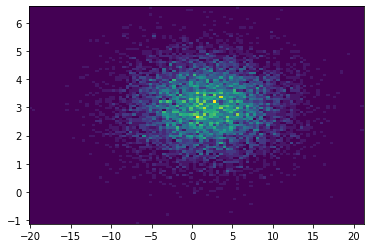

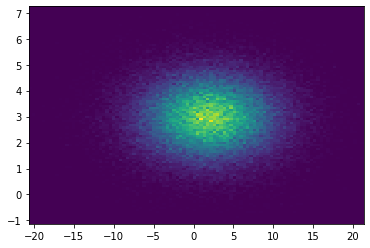

In [10]:
def normalny_2d(n):
  def density_x(x):
    return density(x, 2, 5) 
  def density_y(y):
    return density(y, 3, 1) 
  sample_x = np.random.normal(2, 5, n)
  sample_y = np.random.normal(3, 1, n)
  hist, xedges, yedges, image = plt.hist2d(sample_x, sample_y, 100, density=True)
  plt.show()
  
  
#def normalny_density(n):


normalny_2d(10000)
normalny_2d(100000)

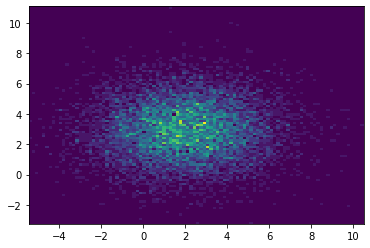

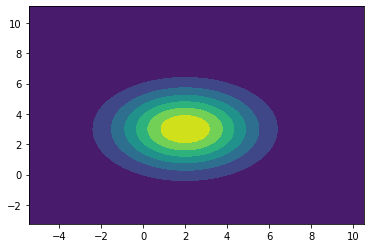

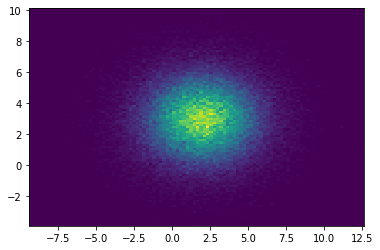

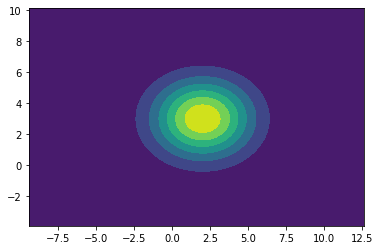

In [11]:
def normal_2d_2(n):
  mean = [2, 3]
  cov = [[5, 0], [0, 3]]
  sample_x, sample_y = np.random.multivariate_normal(mean, cov, n).T
  hist, xedges, yedges, image = plt.hist2d(sample_x, sample_y, 100, density=True)
  plt.show()
  x, y = np.meshgrid(xedges, yedges)
  pos = np.empty(x.shape + (2,))
  pos[:, :, 0] = x; pos[:, :, 1] = y
  rv = multivariate_normal([2, 3], [[5, 0], [0, 3]])
  plt.contourf(x, y, rv.pdf(pos))
  plt.show()

normal_2d_2(10000)
normal_2d_2(100000)

d) Używając danych wygenerowanych w poprzednim punkcie oszacuj prawdopodobieństwo, że
X < Y dla zmiennych losowych X z rozkładem normalnym N(2, 5) i Y z rozkładem normalnym N(3,
1). Uzyskaną wartość porównaj z dokładnym prawdopodobieństwem takiego zdarzenia obliczonym
w oparciu o rachunek prawdopodobieństwa i statystykę. 


In [12]:
def getprob(n):
  res = 0
  sample_x = np.random.normal(2, 5, n)
  sample_y = np.random.normal(3, 1, n)
  for i in range (n):
    if sample_x[i] < sample_y[i]:
      res+=1
  return res/n * 100

print(getprob(100000), '%')
print("prawdopodobieństwo od ręki: ", scipy.stats.norm.cdf(0, -1, math.sqrt(5 ** 2 + 1 ** 2)) * 100, '%')


57.577999999999996 %
prawdopodobieństwo od ręki:  57.774036626352995 %
